In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
temperature_anomaly_df = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/1- temperature-anomaly.csv')
co_emissions_region_df = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/2- annual-co-emissions-by-region.csv')
co_emissions_per_capita_df = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/3- co-emissions-per-capita.csv')

# Display basic information about each dataset
print("Temperature Anomaly Dataset Info:")
print(temperature_anomaly_df.info())

print("\nAnnual CO₂ Emissions by Region Dataset Info:")
print(co_emissions_region_df.info())

print("\nCO₂ Emissions per Capita Dataset Info:")
print(co_emissions_per_capita_df.info())


Temperature Anomaly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   522 non-null    object 
 1   Code                                                                     0 non-null      float64
 2   Year                                                                     522 non-null    int64  
 3   Global average temperature anomaly relative to 1961-1990                 522 non-null    float64
 4   Upper bound of the annual temperature anomaly (95% confidence interval)  522 non-null    float64
 5   Lower bound of the annual temperature anomaly (95% confidence interval)  522 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory

**Data Cleaning for Temperature Anomaly Dataset**

In [2]:
# Drop unnecessary columns and handle missing values
temperature_anomaly_df.drop(['Upper bound of the annual temperature anomaly (95% confidence interval)',
                             'Lower bound of the annual temperature anomaly (95% confidence interval)'], axis=1, inplace=True)
temperature_anomaly_df.dropna(inplace=True)

# Display the cleaned dataset
print("Cleaned Temperature Anomaly Dataset:")
temperature_anomaly_df.head()


Cleaned Temperature Anomaly Dataset:


,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990


**Data Cleaning for Annual CO₂ Emissions by Region Dataset**

In [3]:
# Drop unnecessary columns and handle missing values
co_emissions_region_df.dropna(inplace=True)

# Display the cleaned dataset
print("Cleaned Annual CO₂ Emissions by Region Dataset:")
print(co_emissions_region_df.head())


Cleaned Annual CO₂ Emissions by Region Dataset:
        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0


**Data Cleaning for CO₂ Emissions per Capita Dataset**

In [4]:
# Drop unnecessary columns and handle missing values
co_emissions_per_capita_df.dropna(inplace=True)

# Display the cleaned dataset
print("Cleaned CO₂ Emissions per Capita Dataset:")
print(co_emissions_per_capita_df.head())


Cleaned CO₂ Emissions per Capita Dataset:
        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685


**EDA on Annual CO₂ Emissions by Region**

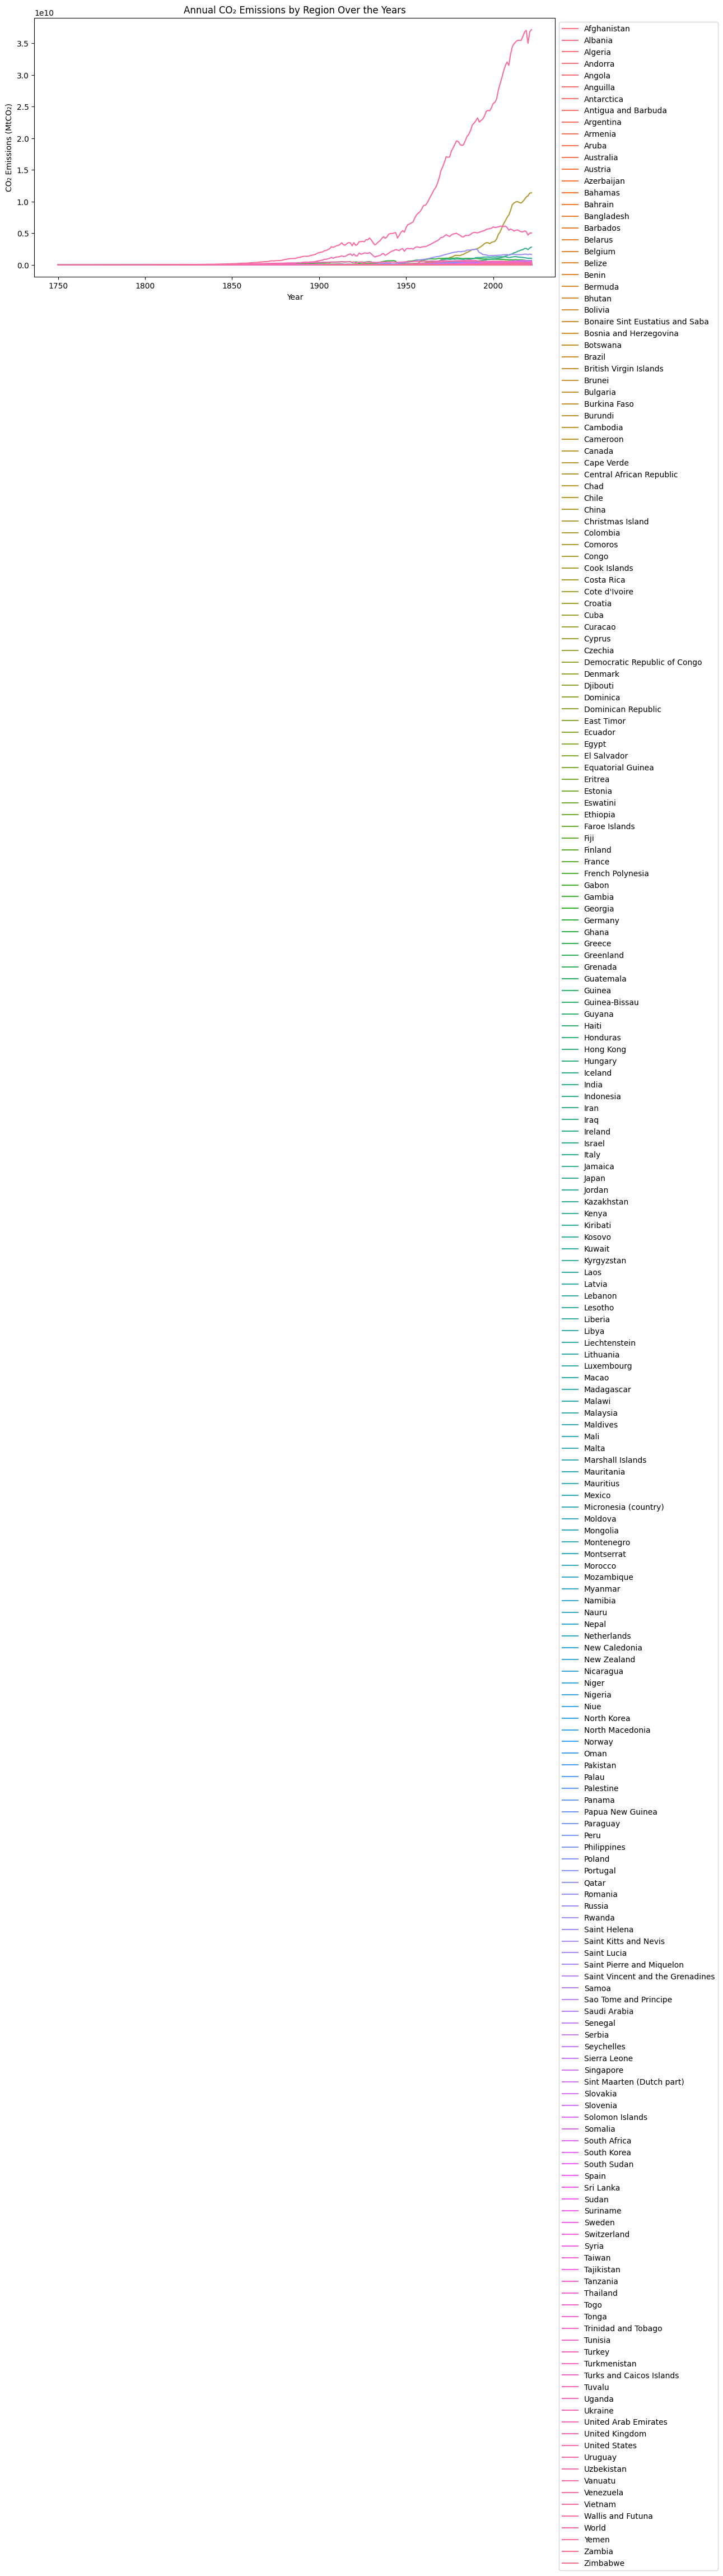

In [5]:
# Explore trends in annual CO₂ emissions by region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions', hue='Entity', data=co_emissions_region_df)
plt.title('Annual CO₂ Emissions by Region Over the Years')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (MtCO₂)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**EDA on CO₂ Emissions per Capita**

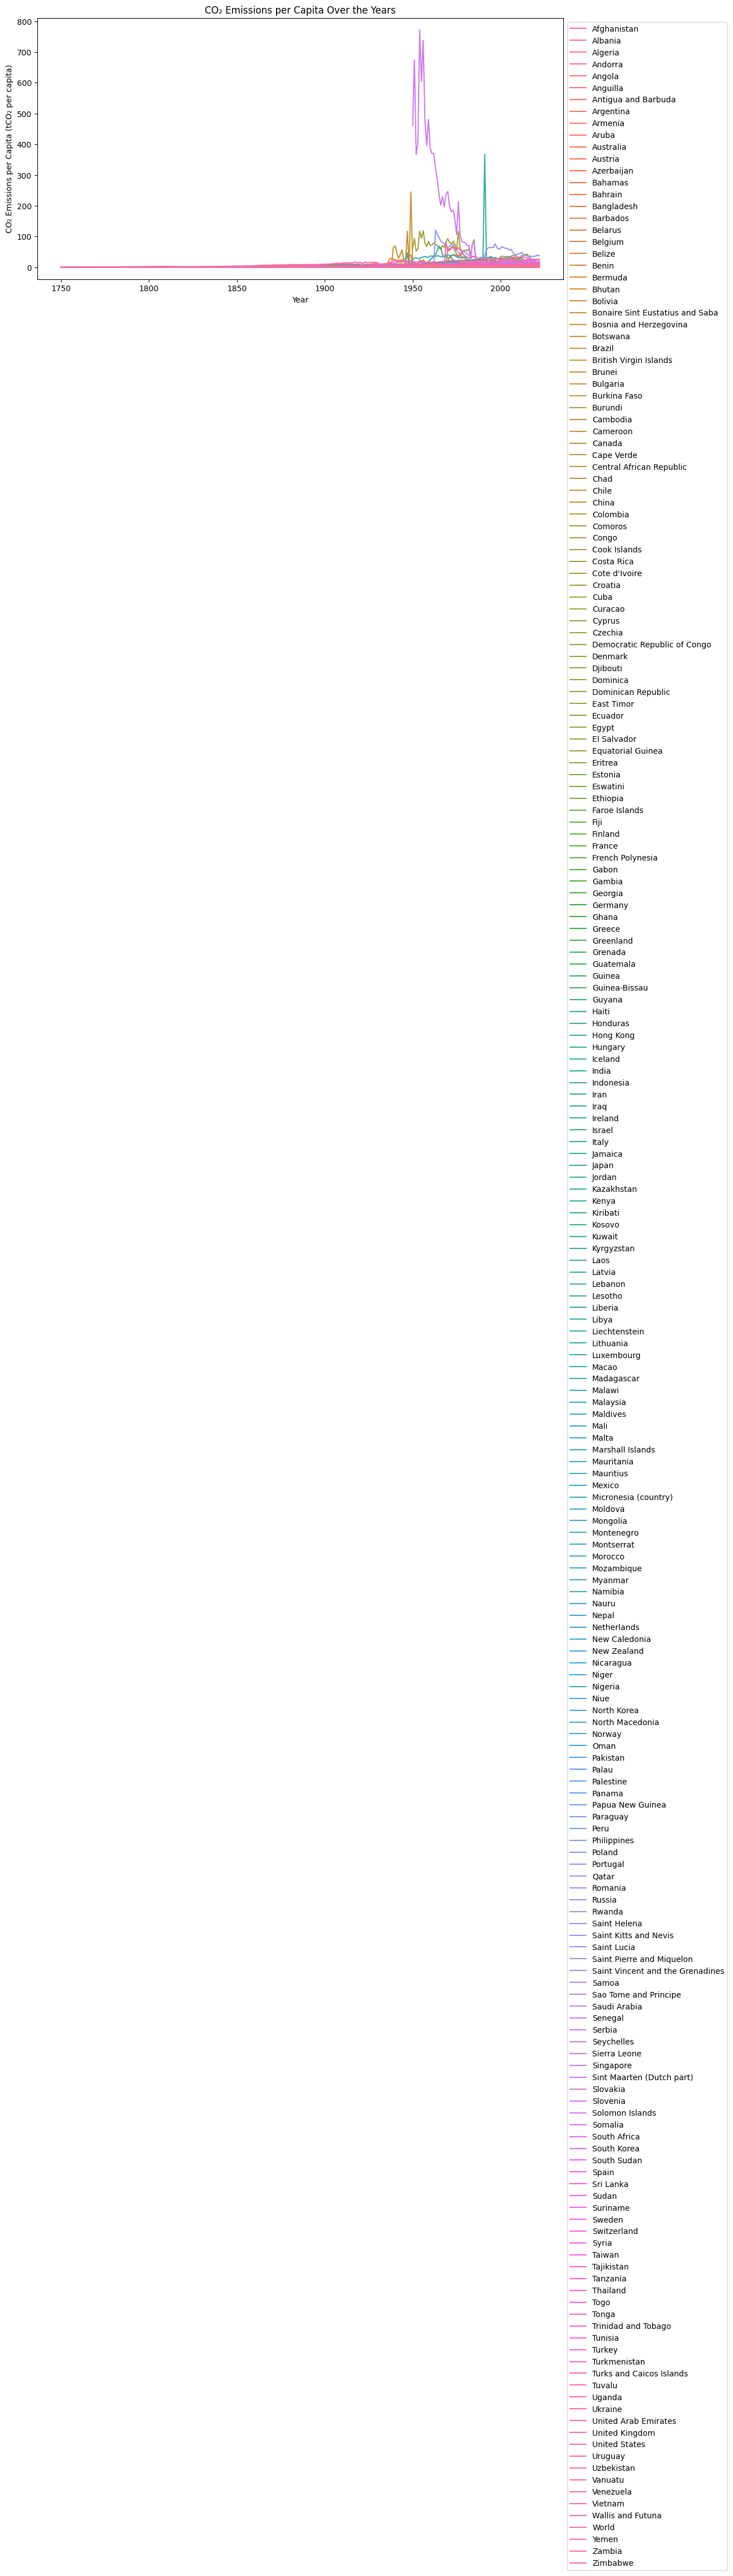

In [6]:
# Explore trends in CO₂ emissions per capita
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity', data=co_emissions_per_capita_df)
plt.title('CO₂ Emissions per Capita Over the Years')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions per Capita (tCO₂ per capita)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Which Regions Contribute Significantly to CO₂ Emissions?**

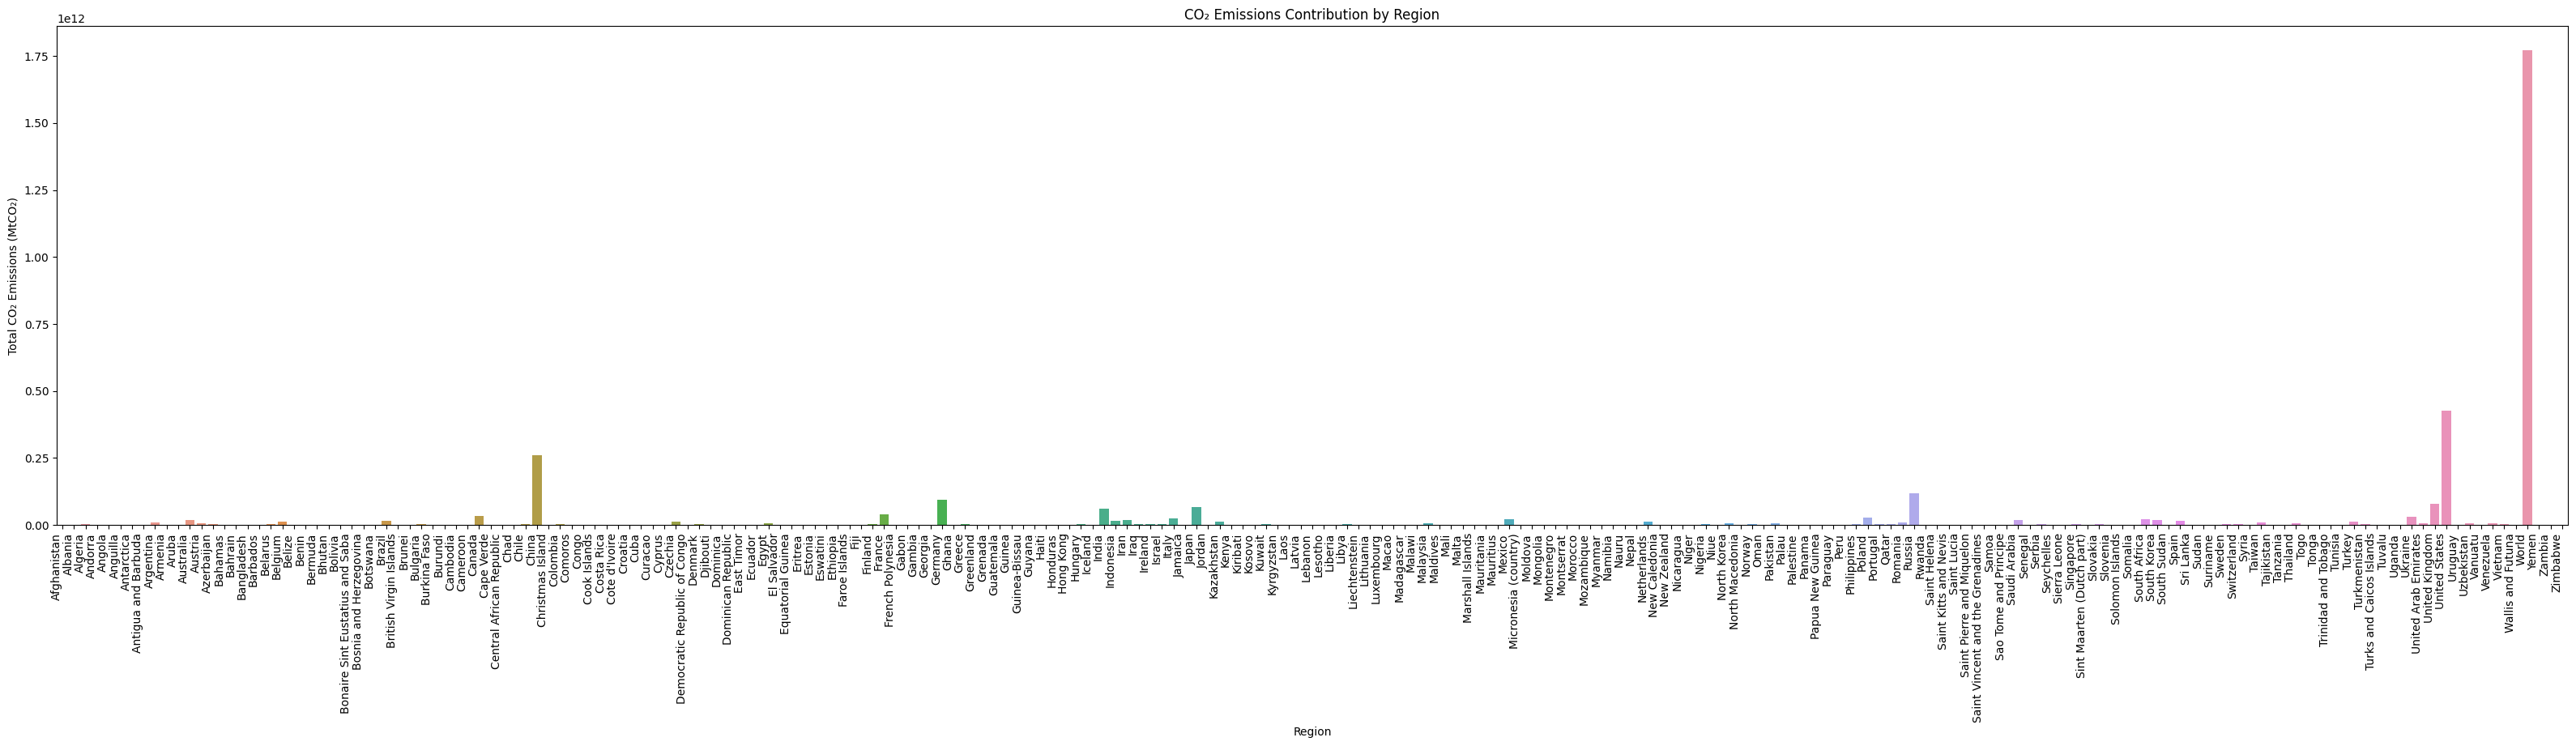

In [7]:
# Identify regions contributing significantly to CO₂ emissions
plt.figure(figsize=(40, 8))
sns.barplot(x='Entity', y='Annual CO₂ emissions', data=co_emissions_region_df.groupby('Entity').sum().reset_index())
plt.title('CO₂ Emissions Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Total CO₂ Emissions (MtCO₂)')
plt.xticks(rotation=90, ha='right')
plt.show()


**How Have CO₂ Emissions per Capita Evolved in High-Emitting Countries?**

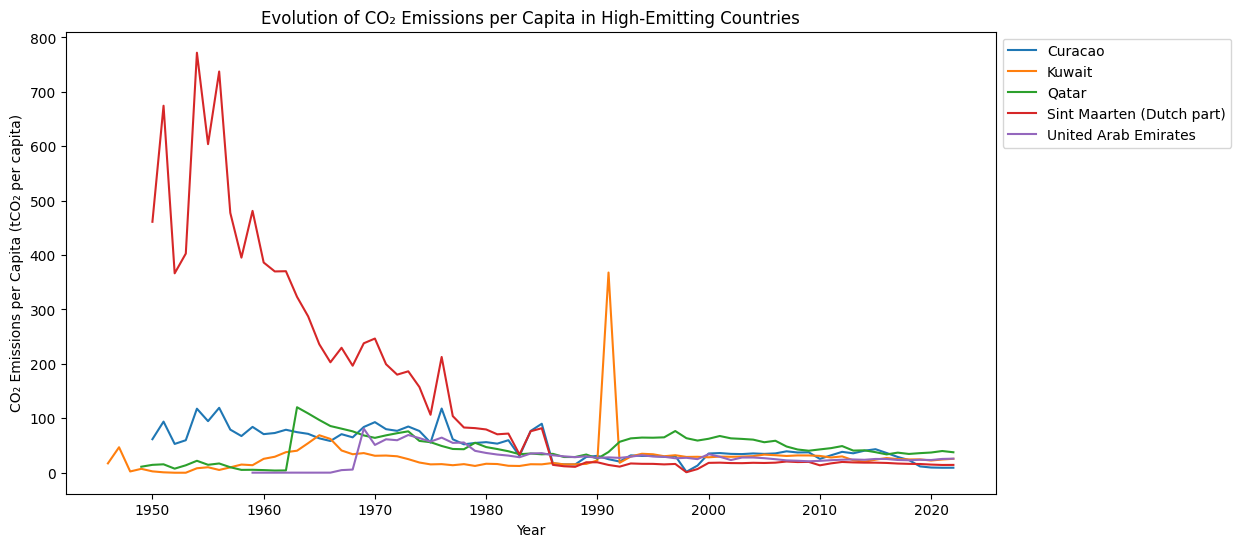

In [8]:
# Select high-emitting countries based on CO₂ emissions per capita
high_emitting_countries = co_emissions_per_capita_df.groupby('Entity')['Annual CO₂ emissions (per capita)'].mean().nlargest(5).index

# Filter and visualize the evolution of CO₂ emissions per capita in high-emitting countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity',
             data=co_emissions_per_capita_df[co_emissions_per_capita_df['Entity'].isin(high_emitting_countries)])
plt.title('Evolution of CO₂ Emissions per Capita in High-Emitting Countries')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions per Capita (tCO₂ per capita)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**How Have CO₂ Emissions per Capita Evolved in High-Emitting Countries?**

In [9]:
import plotly.express as px
 
# Filter and visualize the evolution of CO₂ emissions per capita in high-emitting countries
high_emitting_countries_df = co_emissions_per_capita_df[co_emissions_per_capita_df['Entity'].isin(high_emitting_countries)]

fig = px.line(high_emitting_countries_df, x='Year', y='Annual CO₂ emissions (per capita)', color='Entity', title='Evolution of CO₂ Emissions per Capita in High-Emitting Countries',
              labels={'Annual CO₂ emissions (per capita)': 'CO₂ Emissions per Capita (tCO₂ per capita)', 'Year': 'Year'})
fig.show()


**How Do CO₂ Emissions per Capita Vary Across Different Regions?**

In [10]:
# Create a box plot to explore variations in CO₂ emissions per capita across different regions
fig = px.box(co_emissions_per_capita_df, x='Entity', y='Annual CO₂ emissions (per capita)', title='Variation in CO₂ Emissions per Capita Across Regions',
             labels={'Annual CO₂ emissions (per capita)': 'CO₂ Emissions per Capita (tCO₂ per capita)', 'Entity': 'Region'})
fig.update_xaxes(tickangle=45)
fig.show()


**How Has CO₂ Emissions Per Capita Changed in Different Regions?**

In [11]:
# Create an interactive area plot to visualize the change in CO₂ emissions per capita across different regions
fig = px.area(co_emissions_per_capita_df, x='Year', y='Annual CO₂ emissions (per capita)', color='Entity',
              title='Change in CO₂ Emissions Per Capita Across Different Regions',
              labels={'Annual CO₂ emissions (per capita)': 'CO₂ Emissions Per Capita (tCO₂ per capita)', 'Year': 'Year'})
fig.show()


**How Have Annual CO₂ Emissions Varied Over the Years?**

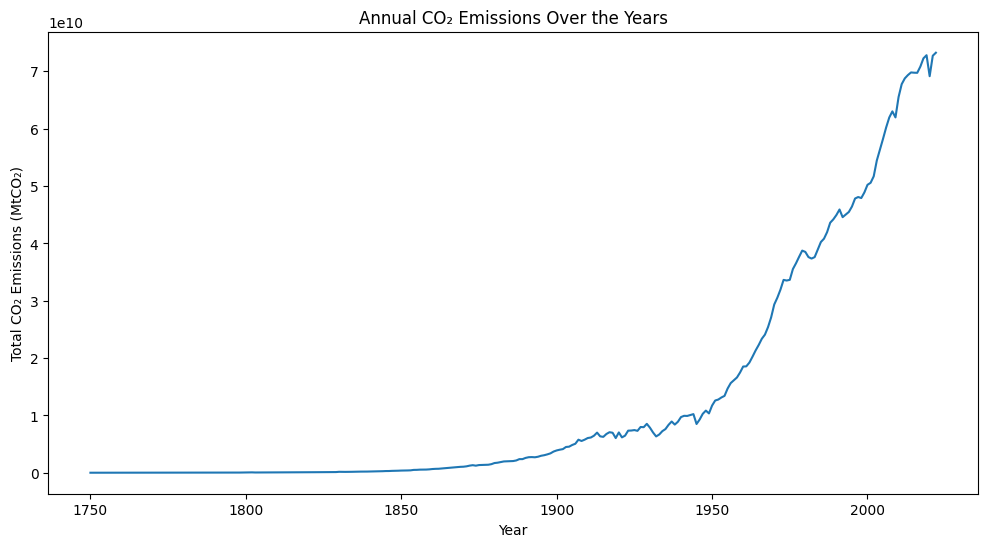

In [12]:
# Plot a line chart to show the trend of annual CO₂ emissions over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual CO₂ emissions', data=co_emissions_region_df.groupby('Year').sum().reset_index())
plt.title('Annual CO₂ Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (MtCO₂)')
plt.show()
